In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('IRIS.csv')

# Show the first 5 rows to check data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Detected Target Column: species


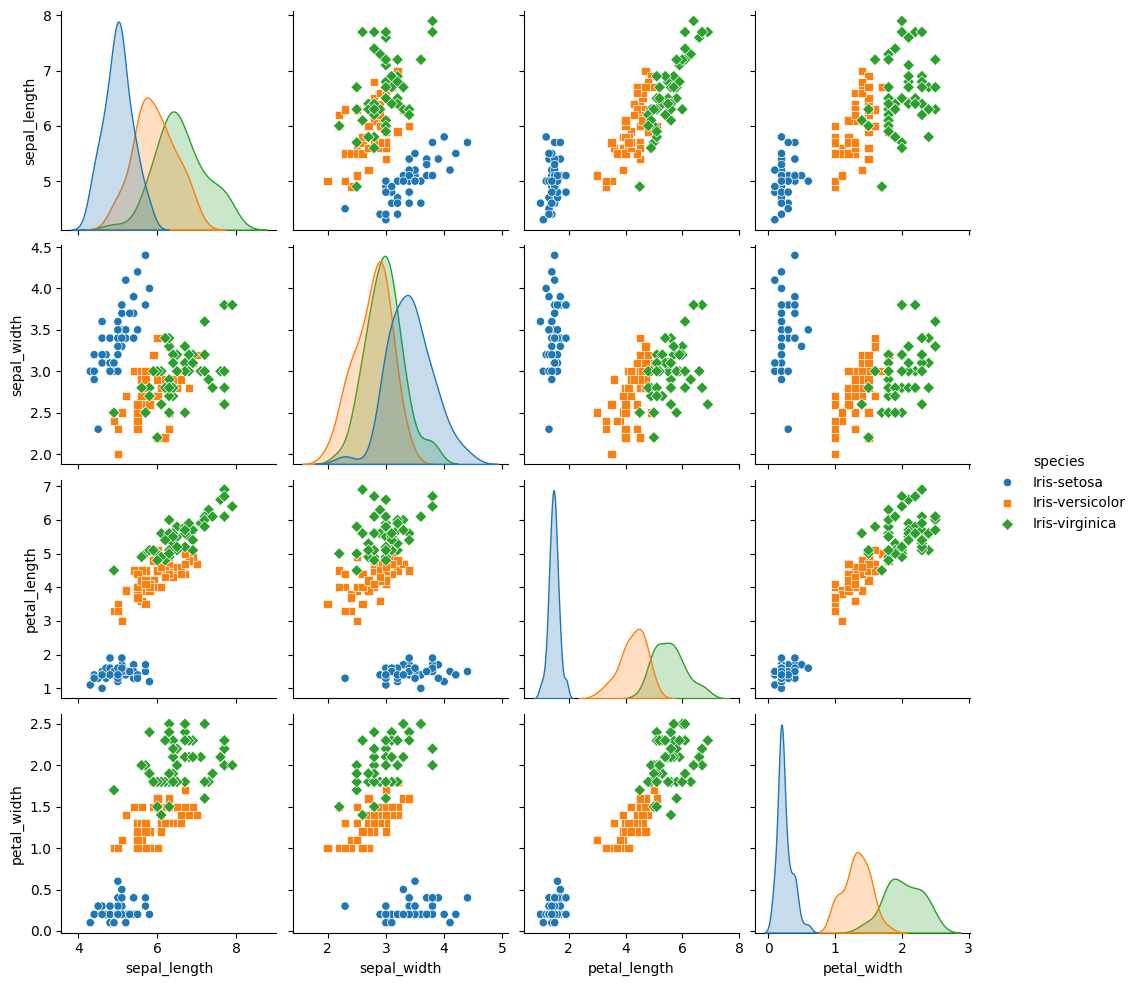

In [3]:
# 1. Get the name of the last column automatically
target_column = df.columns[-1]
print(f"Detected Target Column: {target_column}")

# 2. Visualize
# We use 'target_column' variable instead of hardcoding 'Species'
sns.pairplot(df, hue=target_column, markers=["o", "s", "D"])
plt.show()

In [4]:
# 1. Clean Data (Drop 'Id' if it exists)
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# 2. Separate Features (X) and Target (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 3. Split into training and testing sets (80% train, 20% test)
# This lets us test how accurate the model is
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

print("Model Training Completed!")

Model Training Completed!


In [5]:
# Test the model on the 20% of data it has never seen
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [7]:
# Cell 5: Prediction Function (Fixed)

def predict_custom_flower(sepal_len, sepal_wid, petal_len, petal_wid):
    # We grab the exact column names the model was trained on
    # This fixes the "Feature Name Mismatch" error instantly
    feature_names = X.columns.tolist()
    
    # Create a dictionary using those exact names
    input_data = {
        feature_names[0]: [sepal_len],
        feature_names[1]: [sepal_wid],
        feature_names[2]: [petal_len],
        feature_names[3]: [petal_wid]
    }
    
    # Convert to dataframe
    input_df = pd.DataFrame(input_data)
    
    # Predict
    result = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)
    
    print(f"The Flower is: {result}")
    print(f"Confidence: {probability.max() * 100:.2f}%")

# --- TRY IT YOURSELF HERE ---
print("Testing with a sample flower...")
predict_custom_flower(5.1, 3.5, 1.4, 0.2)

Testing with a sample flower...
The Flower is: Iris-setosa
Confidence: 100.00%
